# 4.9 Task Part 2

## 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 4\Instacart Basket Analysis'

In [3]:
# Importing 'ords_prods_custs_merge' data set

ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merge.pkl'))

In [5]:
# Checking data frame

ords_prods_custs_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First_Name,Last_Name,Gender,State,Age,date_joined,number_of_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
ords_prods_custs_merge.shape

(32404859, 33)

In [52]:
# It appears I misspelled "dependents" when naming the 'number_of_dependents' column. I will first fix this.

ords_prods_custs_merge.rename(columns = {'number_of_dependants' : 'number_of_dependents'}, inplace = True)

## 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### I have already done this in a practice notebook for following along with the tutorial. However, I will recreate these here for this notebook.

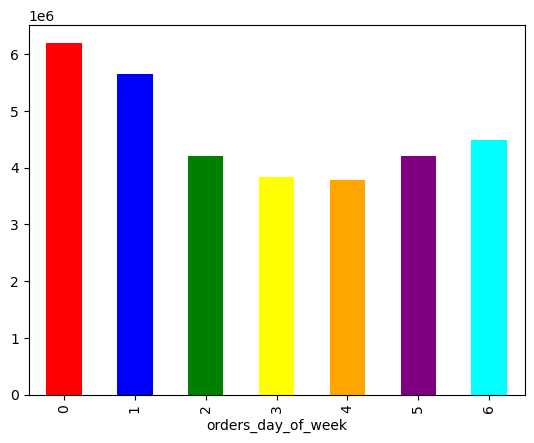

In [8]:
# Creating a bar chart, sorted, and with color.

bar = ords_prods_custs_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan'])

In [9]:
# Saving the bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

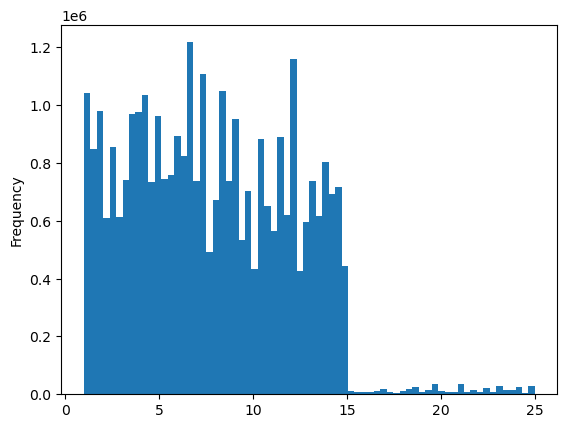

In [10]:
# Creating a histogram

hist = ords_prods_custs_merge['prices'].plot.hist(bins = 70)

In [11]:
# Saving the histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

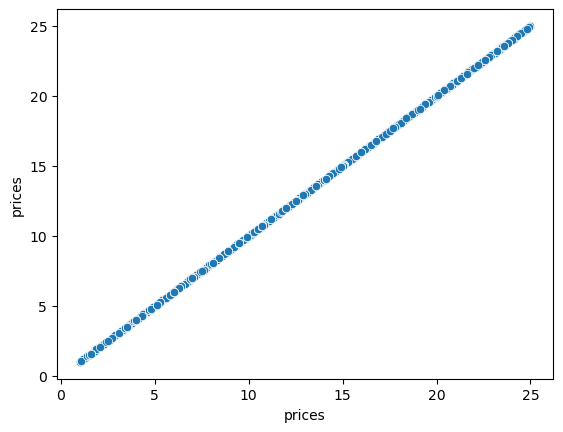

In [14]:
# Creating a scatterplot

sctplt = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_custs_merge)

In [15]:
# Saving the scatterplot

sctplt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sctplt_prices.png'))

In [53]:
# Creating a 70/30 split in the data frame to create a subset to make the line chart from

np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs_merge)) <= 0.7

In [54]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [55]:
# Store 70% of the sample in the data frame 'big'

big = ords_prods_custs_merge[dev]

In [56]:
# Store 30% of the sample in the data frame 'small'

small = ords_prods_custs_merge[~dev]

In [57]:
# Checking then number of rows in the two sample sets

len(ords_prods_custs_merge)

32404859

In [58]:
len(big) + len(small)

32404859

In [23]:
# Creating smaller data frame with only needed columns for line chart

df_2 = small[['orders_day_of_week','prices']]

In [24]:
# Checking output of new data frame

df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


In [25]:
df_2.shape

(9721098, 2)

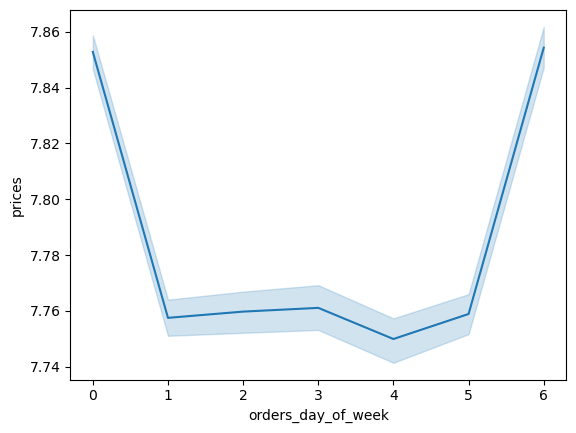

In [26]:
# Creating line chart from 'small' sample set

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [27]:
# Saving the line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

## 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
## In a markdown cell beneath your histogram, describe what the histogram demonstrates.

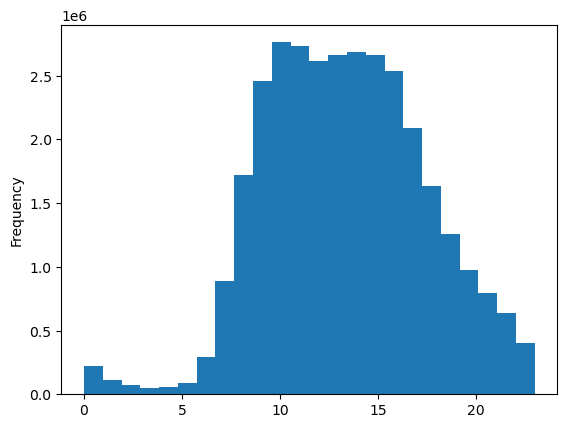

In [30]:
# Creating a histogram on 'order_hour_of_day' column using 24 bins for 24 hours in a day

hist2 = ords_prods_custs_merge['order_hour_of_day'].plot.hist(bins = 24)

### This histogram demondatrates that the early morning hours (1 a.m. to 7 a.m.) have very few orders. The number of orders begins to go up in the mid morning, peaking around 11 a.m., and continues to stay high until about 5 p.m., when they slowly taper off again through the evening.

## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

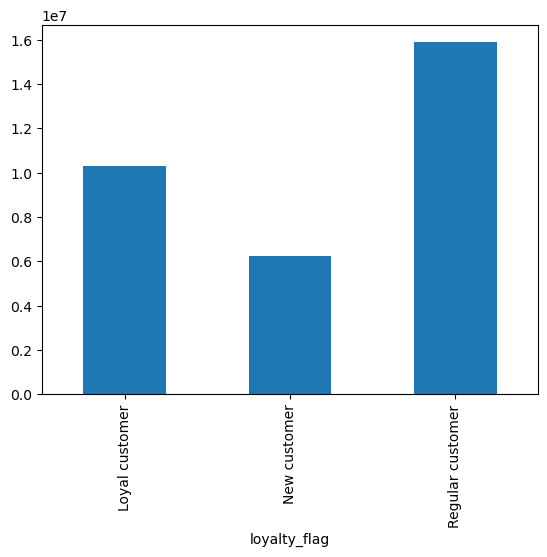

In [31]:
# Creating bar chart from 'loyalty_flag' column

bar2 = ords_prods_custs_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

### This bar chart shows that there are around 16 million regular customers, 10 million loyal customers, and 6 million new customers.

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [69]:
# Creating smaller data frame with only needed columns for line chart

df_1 = small[['order_hour_of_day','prices']]

In [70]:
# Checking output of new data frame

df_1.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


In [71]:
df_1.shape

(9721098, 2)

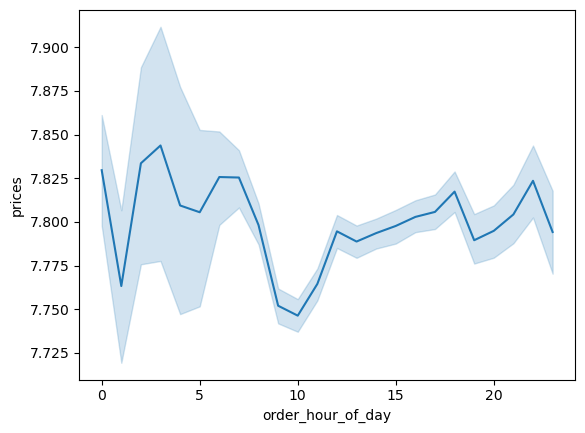

In [72]:
# Creating line chart from 'small' sample set

line1 = sns.lineplot(data = df_1, x = 'order_hour_of_day',y = 'prices')

### The hightest priced items sell in the late evening, night-time, and early morning hours. Interestingly, this is the opposite from when the most orders are placed (fewer orders placed late night and early morning, and more orders placed mid-morning to early afternoon).

## 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
### In a markdown cell beneath your line chart, describe what the line chart shows.

In [59]:
# Creating smaller data frame with only needed columns for line chart

df_3 = small[['Age', 'number_of_dependents']]

In [60]:
# Checking output of new data frame

df_3.head()

,Age,number_of_dependents
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


In [61]:
df_3.shape

(9721098, 2)

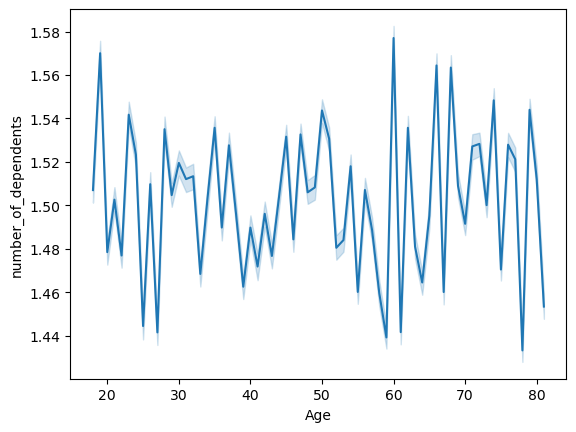

In [63]:
# Creating line chart from 'small' sample set

line2 = sns.lineplot(data = df_3, x = 'Age',y = 'number_of_dependents')

### There does not seem to be a large difference between a customer's age and their number of dependents. Most customers, regardless of age have 1 to 2 dependents. 

## 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

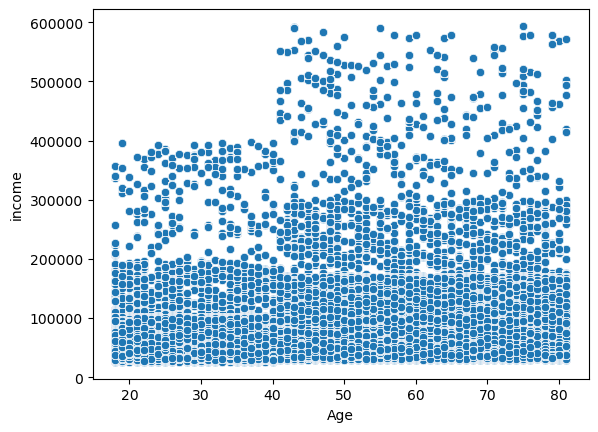

In [66]:
# Creating scatterplot of the entire merged data frame

sctrplt2 = sns.scatterplot(x= 'Age', y = 'income', data = ords_prods_custs_merge)

### The scatterplot above shows that incomes of 200,000 dollars or less is densely and evenly distributed across all ages. Most people with incomes of 200,000 dollars to 300,000 dollars are aged 40 and above. Incomes of 300,000 to 400,000 dollars is evenly distributed across all ages. And incomes of 400,000 to 600,000 dollars is exclusively concentrated in those aged 40 and above.

## 8. Export your visualizations as “.png” files in your relevant project folder.

In [67]:
# Saving the histogram (hist2)

hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [68]:
# Saving bar chart (bar2)

bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [73]:
# Saving line graph (line1)

line1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_by_hour.png'))

In [74]:
# Saving line graph (line2)

line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_and_dependents.png'))

In [76]:
# Saving scatterplot (sctrplt2)

sctrplt2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sctrplt_age_and_income.png'))

## 9. Save your notebook from part 2 of this Exercise’s task.

In [77]:
#I'm also going to export the data frame again because I changed the name of a column and want that reflected in the saved pkl file.

ords_prods_custs_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))